# Traffic cam vehicles trajectories

In [1]:
import pandas as pd

In [2]:
%run ~/Dropbox/NYU/Work/plot_conf.py

In [3]:
plt_style()

In [4]:
file_name = '/scratch/Scratch/I-80-Main-Data'
file_name = '/Users/atcold/Scratch/I-80/'
file_name += '/vehicle-trajectory-data/trajectories-0500-0515.txt'
# file_name += '/vehicle-trajectory-data/trajectories-0515-0530.txt'

#### replacement of the above 3 cells

In [13]:
import pandas as pd
from matplotlib.pylab import *
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='none')

file_name = '/home/boliu/Projects/pytorch-Traffic-Simulator/data_i80/trajectories-0500-0515.txt'

In [14]:
# Cat the first two lines of file_name
!head -2 {file_name}

  284    63   526  1113436773200    41.375    66.469  6042864.125  2133138.844  15.4  5.9   2  44.55   0.00   4     0     0   0.00      0.00 
  284    64   526  1113436773300    41.375    71.069  6042863.571  2133143.309  15.4  5.9   2  44.55   0.00   4     0     0   0.00      0.00 


In [15]:
df = pd.read_table(file_name, sep='\s+', header=None, names=(
    'Vehicle ID',
    'Frame ID',
    'Total Frames',
    'Global Time',
    'Local X',
    'Local Y',
    'Global X',
    'Global Y',
    'Vehicle Length',
    'Vehicle Width',
    'Vehicle Class',
    'Vehicle Velocity',
    'Vehicle Acceleration',
    'Lane Identification',
    'Preceding Vehicle',
    'Following Vehicle',
    'Spacing',
    'Headway'
))

In [6]:
df[:2]

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Global X,Global Y,Vehicle Length,Vehicle Width,Vehicle Class,Vehicle Velocity,Vehicle Acceleration,Lane Identification,Preceding Vehicle,Following Vehicle,Spacing,Headway
0,284,63,526,1113436773200,41.375,66.469,6042864.125,2133138.844,15.4,5.9,2,44.55,0.0,4,0,0,0.0,0.0
1,284,64,526,1113436773300,41.375,71.069,6042863.571,2133143.309,15.4,5.9,2,44.55,0.0,4,0,0,0.0,0.0


In [8]:
len(df)

1549918

In [7]:
df[-2:]

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Global X,Global Y,Vehicle Length,Vehicle Width,Vehicle Class,Vehicle Velocity,Vehicle Acceleration,Lane Identification,Preceding Vehicle,Following Vehicle,Spacing,Headway
1549916,2872,7022,290,1113437469100,11.423,1685.988,6042606.003,2134738.584,5.9,3.6,1,47.64,0.0,1,0,2079,0.0,0.0
1549917,2872,7023,290,1113437469200,11.582,1690.001,6042605.520,2134742.571,5.9,3.6,1,47.64,0.0,1,0,2079,0.0,0.0


In [10]:
len(df[df['Vehicle ID'] == 284])

526

In [21]:
def plot_xy(x, y, xlabel, ylabel, grid, vehicles, my_df=None, xlim=True):
    my_df = df if my_df is None else my_df
    plt.figure()
    ax = None
    for v in vehicles:
        ax = (my_df[my_df['Vehicle ID'] == v]).plot(x=x, y=y, label=str(v), ax=ax, figsize=(16,4))
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(color=grid)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    if xlim:
        plt.xlim([160, 1025])
        plt.axvline(x=187, ls='--')
        plt.axvline(x=657, ls='--')
        plt.axvline(x=824, ls='--')
        plt.axvline(x=1000, ls='--')

<Figure size 1152x576 with 0 Axes>

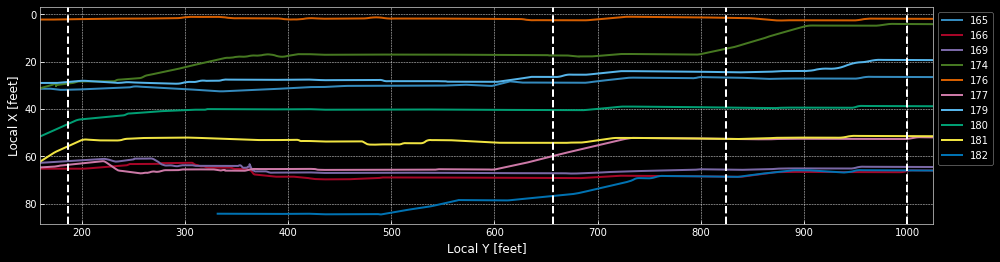

<Figure size 1152x576 with 0 Axes>

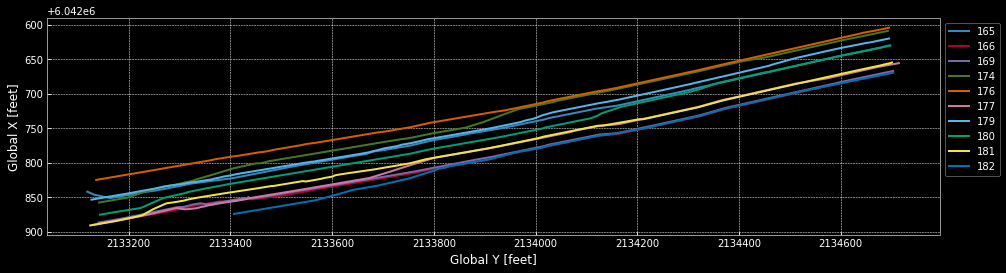

<Figure size 1152x576 with 0 Axes>

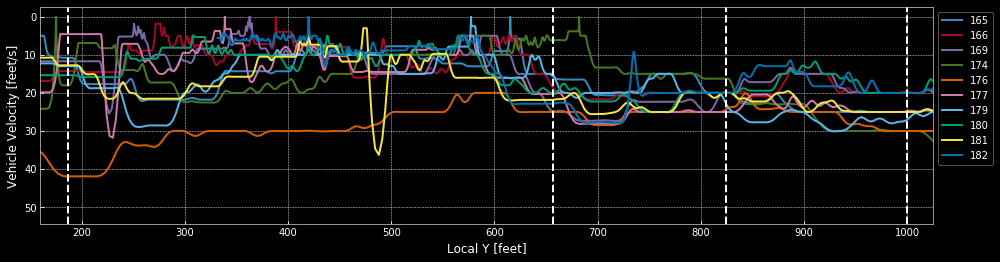

<Figure size 1152x576 with 0 Axes>

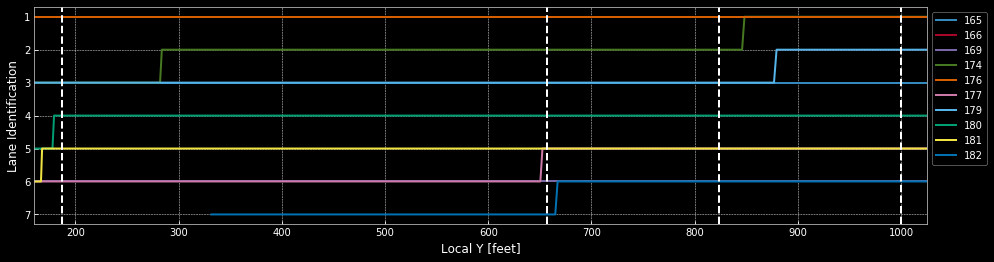

In [22]:
vv = df['Vehicle ID'].unique()[100:110]
plot_xy('Local Y', 'Local X', 'Local Y [feet]', 'Local X [feet]', '0.9', vv)
plot_xy('Global Y', 'Global X', 'Global Y [feet]', 'Global X [feet]', '1', vv, xlim=False)
plot_xy('Local Y', 'Vehicle Velocity', 'Local Y [feet]', 'Vehicle Velocity [feet/s]', '0.9', vv)
plot_xy('Local Y', 'Lane Identification', 'Local Y [feet]', 'Lane Identification', '0.9', vv)

In [14]:
df[df['Vehicle Velocity'] < 0][:10]

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Global X,Global Y,Vehicle Length,Vehicle Width,Vehicle Class,Vehicle Velocity,Vehicle Acceleration,Lane Identification,Preceding Vehicle,Following Vehicle,Spacing,Headway


Text(0,0.5,'Count')

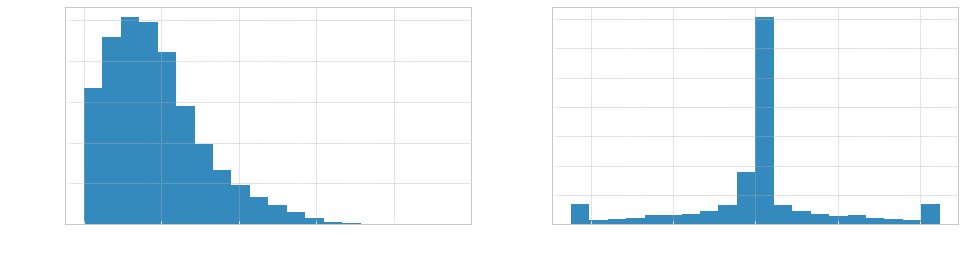

In [15]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
df['Vehicle Velocity'].hist(bins=20)
plt.xlabel('Vehicle Velocity [feet/s]')
plt.ylabel('Count')

e.plt.subplot(1,2,2)
df['Vehicle Acceleration'].hist(bins=20)
plt.xlabel('Vehicle Acceleration [feet/s Square]')
plt.ylabel('Count')

In [33]:
fields = [
    'Vehicle ID',
    'Frame ID',
    'Total Frames',
    'Global Time',
    'Local X',
    'Local Y',
#     'Global X',
#     'Global Y',
#     'Vehicle Length',
#     'Vehicle Width',
#     'Vehicle Class',
    'Vehicle Velocity',
    'Vehicle Acceleration',
    'Lane Identification',
#     'Preceding Vehicle',
#     'Following Vehicle',
#     'Spacing',
#     'Headway'
]

In [34]:
df.loc[:5,fields]

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Vehicle Velocity,Vehicle Acceleration,Lane Identification
0,284,63,526,1113436773200,41.375,66.469,44.55,0.00,4
1,284,64,526,1113436773300,41.375,71.069,44.55,0.00,4
2,284,65,526,1113436773400,41.374,75.570,44.55,0.00,4
3,284,66,526,1113436773500,41.373,80.070,44.55,0.00,4
4,284,67,526,1113436773600,41.372,84.607,44.55,-6.14,4
5,284,68,526,1113436773700,41.369,89.058,43.77,-10.10,4


In [39]:
df['Frame ID'].min()

6

In [43]:
from IPython.display import display

In [53]:
for i in range(14, 64, 10):
    display(df[df['Frame ID'] == df['Frame ID'].min() + i].loc[:,fields])

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Vehicle Velocity,Vehicle Acceleration,Lane Identification
3682,294,20,565,1113436768900,18.117,108.086,29.08,5.83,2


,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Vehicle Velocity,Vehicle Acceleration,Lane Identification
3041,293,30,630,1113436769900,30.874,74.568,29.82,0.00,3
3692,294,30,565,1113436769900,18.039,138.174,30.48,-0.99,2


,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Vehicle Velocity,Vehicle Acceleration,Lane Identification
3051,293,40,630,1113436770900,30.805,107.364,35.17,-0.42,3
3702,294,40,565,1113436770900,18.741,168.245,30.00,0.00,2
6467,305,40,562,1113436770900,18.122,82.232,28.24,-2.33,2


,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Vehicle Velocity,Vehicle Acceleration,Lane Identification
957,286,50,622,1113436771900,63.765,90.608,33.91,3.08,6
3061,293,50,630,1113436771900,31.081,142.579,35.27,0.28,3
3712,294,50,565,1113436771900,19.513,198.085,27.76,-11.20,2
6477,305,50,562,1113436771900,18.119,111.570,29.33,-1.40,2
10305,314,50,575,1113436771900,16.874,73.564,29.06,0.00,2


,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Vehicle Velocity,Vehicle Acceleration,Lane Identification
967,286,60,622,1113436772900,61.506,125.359,34.19,-9.99,6
3071,293,60,630,1113436772900,30.895,174.653,29.30,5.19,3
3722,294,60,565,1113436772900,20.683,223.766,25.52,0.00,2
4236,295,60,645,1113436772900,31.374,75.067,40.17,0.00,3
6487,305,60,562,1113436772900,18.142,140.180,27.91,-3.02,2
9707,313,60,595,1113436772900,18.861,60.518,31.21,0.00,2
10315,314,60,575,1113436772900,16.868,102.686,28.74,-2.83,2


In [55]:
df[df['Frame ID'] == 60].loc[:,fields]

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Vehicle Velocity,Vehicle Acceleration,Lane Identification
967,286,60,622,1113436772900,61.506,125.359,34.19,-9.99,6
3071,293,60,630,1113436772900,30.895,174.653,29.30,5.19,3
3722,294,60,565,1113436772900,20.683,223.766,25.52,0.00,2
4236,295,60,645,1113436772900,31.374,75.067,40.17,0.00,3
6487,305,60,562,1113436772900,18.142,140.180,27.91,-3.02,2
9707,313,60,595,1113436772900,18.861,60.518,31.21,0.00,2
10315,314,60,575,1113436772900,16.868,102.686,28.74,-2.83,2


In [189]:
set(df[(df['Frame ID'] == 60) & (df['Local Y'] > 100)]['Vehicle ID'])
# df.query('"Spacing" > 619')#.loc[:,'Vehicle ID']

{286, 293, 294, 305, 314}

In [89]:
df[df['Vehicle ID'] == 286][:10]

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Global X,Global Y,Vehicle Length,Vehicle Width,Vehicle Class,Vehicle Velocity,Vehicle Acceleration,Lane Identification,Preceding Vehicle,Following Vehicle,Spacing,Headway
949,286,42,622,1113436771100,65.118,63.416,6042888.063,2133138.791,14.3,6.4,2,32.78,0.00,6,0,0,0.0,0.0
950,286,43,622,1113436771200,65.126,67.575,6042887.571,2133142.761,14.3,6.4,2,32.78,0.00,6,0,0,0.0,0.0
951,286,44,622,1113436771300,64.625,70.574,6042886.705,2133145.676,14.3,6.4,2,32.78,0.00,6,0,0,0.0,0.0
952,286,45,622,1113436771400,64.624,74.075,6042886.274,2133149.150,14.3,6.4,2,32.78,0.00,6,0,0,0.0,0.0
953,286,46,622,1113436771500,64.124,77.574,6042885.347,2133152.561,14.3,6.4,2,32.78,0.00,6,0,0,0.0,0.0
954,286,47,622,1113436771600,64.151,80.691,6042885.002,2133155.570,14.3,6.4,2,32.78,-2.11,6,0,0,0.0,0.0
955,286,48,622,1113436771700,64.092,83.902,6042884.537,2133158.841,14.3,6.4,2,32.88,5.70,6,0,0,0.0,0.0
956,286,49,622,1113436771800,63.945,87.208,6042883.987,2133162.083,14.3,6.4,2,33.44,6.51,6,0,0,0.0,0.0
957,286,50,622,1113436771900,63.765,90.608,6042883.389,2133165.448,14.3,6.4,2,33.91,3.08,6,0,0,0.0,0.0
958,286,51,622,1113436772000,63.497,94.038,6042882.699,2133168.842,14.3,6.4,2,34.05,-0.41,6,0,0,0.0,0.0


In [90]:
my_df = df[df['Vehicle ID'] == 286]

In [114]:
int(my_df[:1]['Vehicle ID'])

286

In [182]:
my_df[:1]['Vehicle ID'].values[0]

286

In [187]:
my_df.at[my_df.index[0], 'Vehicle ID']

286

In [137]:
p = np.array(my_df.loc[:,['Local X', 'Local Y']][0:1]).squeeze()
p

array([65.126, 67.575])

In [157]:
np.array(my_df.loc[:,['Vehicle Length', 'Vehicle Width']][:1]).squeeze()

array([14.3,  6.4])

In [163]:
my_df.loc[:,['Vehicle Length', 'Vehicle Width']].values[0]

array([14.3,  6.4])

In [168]:
my_df.loc[:950,['Vehicle Length', 'Vehicle Width']]

,Vehicle Length,Vehicle Width
949,14.3,6.4
950,14.3,6.4


In [179]:
my_df.loc[my_df.index[0], ['Vehicle ID', 'Vehicle Length']].values

array([286. ,  14.3])

In [178]:
my_df.index[0]

949

In [192]:
length = my_df.at[my_df.index[0], 'Vehicle Length']
length

14.3

In [191]:
LANE_W = 24  # pixels / 3.7 m, lane width
SCALE = LANE_W / 3.7
FOOT = 0.3048  # metres per foot
X_OFFSET = 370

In [193]:
length * FOOT * SCALE

28.27225945945946

In [198]:
df['Vehicle Velocity'].max() * FOOT * 3.6

104.570784

In [61]:
funky_vehicles = [313, 315, 396, 456, 461, 526, 575, 662, 721, 723, 790, 920, 1048]

(160, 300)

<Figure size 1152x576 with 0 Axes>

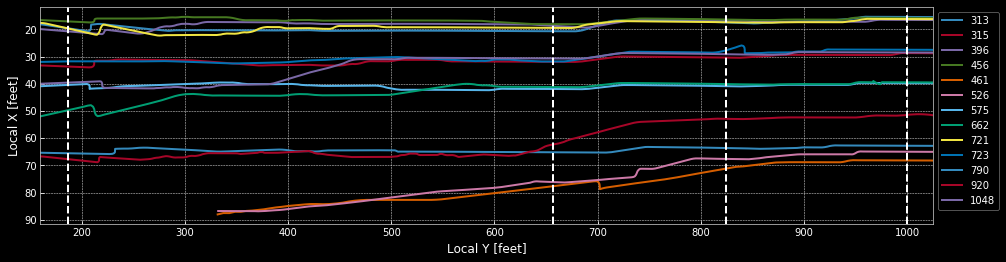

<Figure size 1152x576 with 0 Axes>

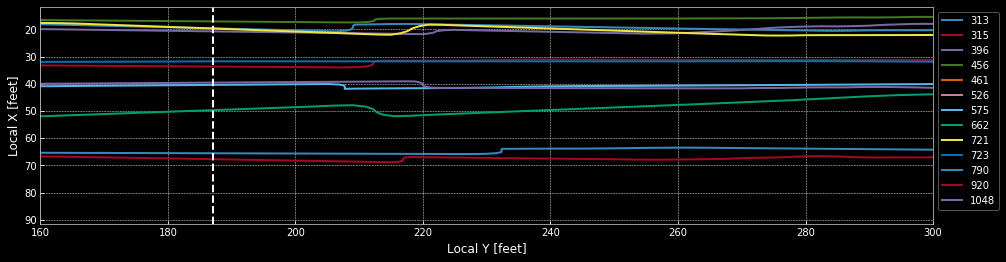

In [104]:
plot_xy('Local Y', 'Local X', 'Local Y [feet]', 'Local X [feet]', '0.9', funky_vehicles)
plt.xlim([160, 1025])
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.axvline(x=187, ls='--')
# plt.axvline(x=657, ls='--')
# plt.axvline(x=824, ls='--')
# plt.axvline(x=1000, ls='--')

vv = df['Vehicle ID'].unique()[100:110]
plot_xy('Local Y', 'Local X', 'Local Y [feet]', 'Local X [feet]', '0.9', funky_vehicles)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlim([160, 300])
# plt.axvline(x=187, ls='--')

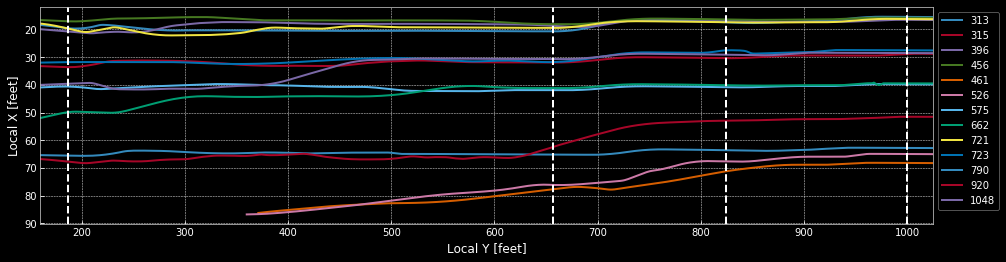

In [281]:
plot_xy('Local Y', 'Local X', 'Local Y [feet]', 'Local X [feet]', '0.9', funky_vehicles, df.rolling(window=15, min_periods=1).mean())
plt.xlim([160, 1025])
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.axvline(x=187, ls='--')
plt.axvline(x=657, ls='--')
plt.axvline(x=824, ls='--')
plt.axvline(x=1000, ls='--')

In [284]:
test = df.rolling(window=15, min_periods=1).mean()

In [285]:
display(df[:10])
display(test[:10])

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Global X,Global Y,Vehicle Length,Vehicle Width,Vehicle Class,Vehicle Velocity,Vehicle Acceleration,Lane Identification,Preceding Vehicle,Following Vehicle,Spacing,Headway
0,284,63,526,1113436773200,41.375,66.469,6042864.125,2133138.844,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
1,284,64,526,1113436773300,41.375,71.069,6042863.571,2133143.309,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
2,284,65,526,1113436773400,41.374,75.570,6042863.016,2133147.775,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
3,284,66,526,1113436773500,41.373,80.070,6042862.462,2133152.241,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
4,284,67,526,1113436773600,41.372,84.607,6042861.904,2133156.736,15.4,5.9,2,44.55,-6.14,4,0,0,0.0,0.0
5,284,68,526,1113436773700,41.369,89.058,6042861.350,2133161.189,15.4,5.9,2,43.77,-10.10,4,0,0,0.0,0.0
6,284,69,526,1113436773800,41.369,93.368,6042860.818,2133165.481,15.4,5.9,2,43.00,-7.12,4,0,0,0.0,0.0
7,284,70,526,1113436773900,41.369,97.565,6042860.307,2133169.608,15.4,5.9,2,42.89,3.56,4,0,0,0.0,0.0
8,284,71,526,1113436774000,41.376,101.844,6042859.800,2133173.755,15.4,5.9,2,43.84,11.20,4,0,0,0.0,0.0
9,284,72,526,1113436774100,41.396,106.346,6042859.274,2133178.163,15.4,5.9,2,45.83,11.20,4,0,0,0.0,0.0


,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Global X,Global Y,Vehicle Length,Vehicle Width,Vehicle Class,Vehicle Velocity,Vehicle Acceleration,Lane Identification,Preceding Vehicle,Following Vehicle,Spacing,Headway
0,284.0,63.0,526.0,1.113437e+12,41.375000,66.469000,6.042864e+06,2.133139e+06,15.4,5.9,2.0,44.550000,0.000000,4.0,0.0,0.0,0.0,0.0
1,284.0,63.5,526.0,1.113437e+12,41.375000,68.769000,6.042864e+06,2.133141e+06,15.4,5.9,2.0,44.550000,0.000000,4.0,0.0,0.0,0.0,0.0
2,284.0,64.0,526.0,1.113437e+12,41.374667,71.036000,6.042864e+06,2.133143e+06,15.4,5.9,2.0,44.550000,0.000000,4.0,0.0,0.0,0.0,0.0
3,284.0,64.5,526.0,1.113437e+12,41.374250,73.294500,6.042863e+06,2.133146e+06,15.4,5.9,2.0,44.550000,0.000000,4.0,0.0,0.0,0.0,0.0
4,284.0,65.0,526.0,1.113437e+12,41.373800,75.557000,6.042863e+06,2.133148e+06,15.4,5.9,2.0,44.550000,-1.228000,4.0,0.0,0.0,0.0,0.0
5,284.0,65.5,526.0,1.113437e+12,41.373000,77.807167,6.042863e+06,2.133150e+06,15.4,5.9,2.0,44.420000,-2.706667,4.0,0.0,0.0,0.0,0.0
6,284.0,66.0,526.0,1.113437e+12,41.372429,80.030143,6.042862e+06,2.133152e+06,15.4,5.9,2.0,44.217143,-3.337143,4.0,0.0,0.0,0.0,0.0
7,284.0,66.5,526.0,1.113437e+12,41.372000,82.222000,6.042862e+06,2.133154e+06,15.4,5.9,2.0,44.051250,-2.475000,4.0,0.0,0.0,0.0,0.0
8,284.0,67.0,526.0,1.113437e+12,41.372444,84.402222,6.042862e+06,2.133157e+06,15.4,5.9,2.0,44.027778,-0.955556,4.0,0.0,0.0,0.0,0.0
9,284.0,67.5,526.0,1.113437e+12,41.374800,86.596600,6.042862e+06,2.133159e+06,15.4,5.9,2.0,44.208000,0.260000,4.0,0.0,0.0,0.0,0.0


In [272]:
df[df['Global Time'] == (df['Global Time'].min() + 200)]

,Vehicle ID,Frame ID,Total Frames,Global Time,Local X,Local Y,Global X,Global Y,Vehicle Length,Vehicle Width,Vehicle Class,Vehicle Velocity,Vehicle Acceleration,Lane Identification,Preceding Vehicle,Following Vehicle,Spacing,Headway
3670,294,8,565,1113436767700,18.124,73.065,6042840.251,2133142.431,16.3,7.4,2,28.63,0.0,2,0,0,0.0,0.0


In [287]:
my_df = df[df['Vehicle ID'] == 294]

In [288]:
x = my_df['Local Y']
y = my_df['Local X']

In [296]:
xy = pd.concat((x, y), axis=1, keys=('x', 'y'))
xy[:10]

,x,y
3668,67.065,18.126
3669,70.065,18.126
3670,73.065,18.124
3671,76.065,18.124
3672,79.065,18.124
3673,81.774,18.123
3674,84.601,18.122
3675,87.531,18.121
3676,90.549,18.121
3677,93.581,18.120


In [303]:
xy.loc[xy.index[0]].values

array([67.065, 18.126])

In [98]:
vv = (5,)
plot_xy('Local Y', 'Local X', 'Local Y [feet]', 'Local X [feet]', '0.9', vv)#, df.rolling(window=15).mean())
plt.ylim([90, 0])

TypeError: Empty 'DataFrame': no numeric data to plot

<Figure size 1152x576 with 0 Axes>

In [89]:
def plot_angle(x, y, xlabel, ylabel, grid, vehicles, my_df=None):
    my_df = df if my_df is None else my_df
    plt.figure(figsize=(16,4))
    ax = None
    for v in vehicles:
        x = my_df[my_df['Vehicle ID'] == v]['Local Y'].values
        diff = my_df[my_df['Vehicle ID'] == v].diff()
        delta_x = diff['Local Y'].values
        delta_y = diff['Local X'].values
        alpha = np.arctan2(delta_y, delta_x) * 180 / np.pi
        plt.plot(x, alpha, label=v)
    plt.xlabel(xlabel)
    plt.ylabel('Vehicle direction angle [deg]')
    plt.grid(color=grid)
    plt.xlim([160, 1025])
    plt.axvline(x=187, ls='--')
    plt.axvline(x=657, ls='--')
    plt.axvline(x=824, ls='--')
    plt.axvline(x=1000, ls='--')
    plt.ylim((-100, 100))
    plt.yticks(np.linspace(-90, 90, 13))
    plt.gca().invert_yaxis()


In [118]:
def plot_angle_smooth(x, y, xlabel, ylabel, grid, vehicles, my_df=None):
    my_df = df if my_df is None else my_df
    plt.figure(figsize=(16,4))
    ax = None
    for v in vehicles:
        x = my_df[my_df['Vehicle ID'] == v]['Local Y'].values
        diff = my_df[my_df['Vehicle ID'] == v].diff()
        delta_x = diff['Local Y'].values
        delta_y = diff['Local X'].values
        alpha = np.arctan2(delta_y, delta_x + 2) * 180 / np.pi
        plt.plot(x, alpha, label=v)
    plt.xlabel(xlabel)
    plt.ylabel('Vehicle direction angle [deg]')
    plt.grid(color=grid)
    plt.xlim([160, 1025])
    plt.axvline(x=187, ls='--')
    plt.axvline(x=657, ls='--')
    plt.axvline(x=824, ls='--')
    plt.axvline(x=1000, ls='--')
    plt.ylim((-100, 100))
    plt.yticks(np.linspace(-90, 90, 13))
    plt.gca().invert_yaxis()


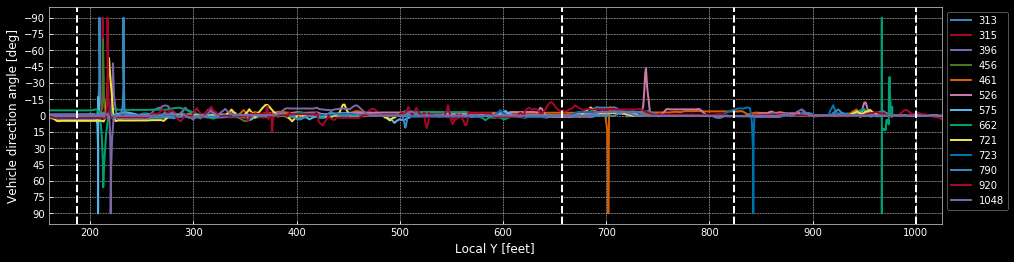

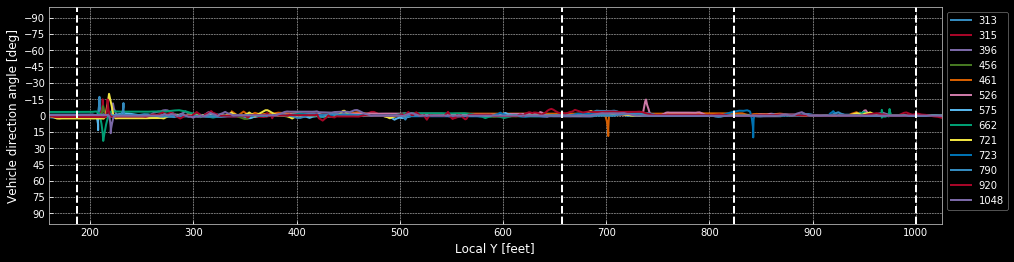

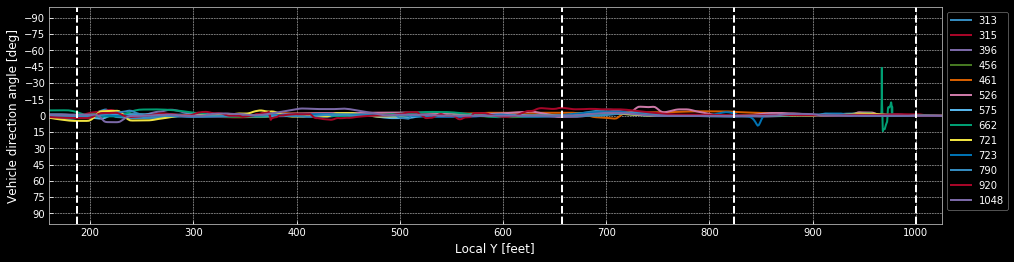

In [121]:
plot_angle('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles)#, df.rolling(window=15).mean())
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plot_angle_smooth('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles)#, df.rolling(window=15).mean())
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plot_angle('Local Y', 'Local X', 'Local Y [feet]', '1.5s running avg', '0.9', funky_vehicles, df.rolling(window=15).mean())
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

<Figure size 1152x576 with 0 Axes>

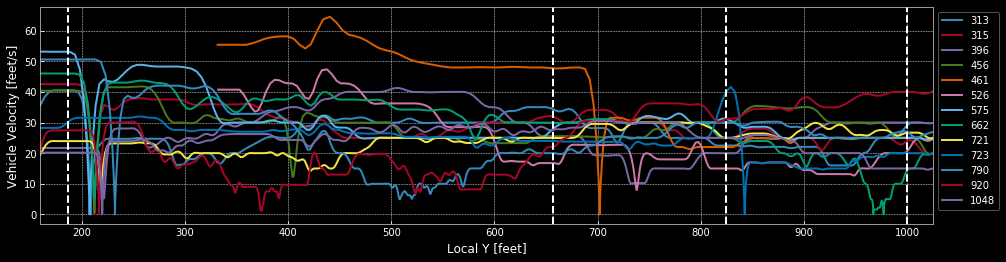

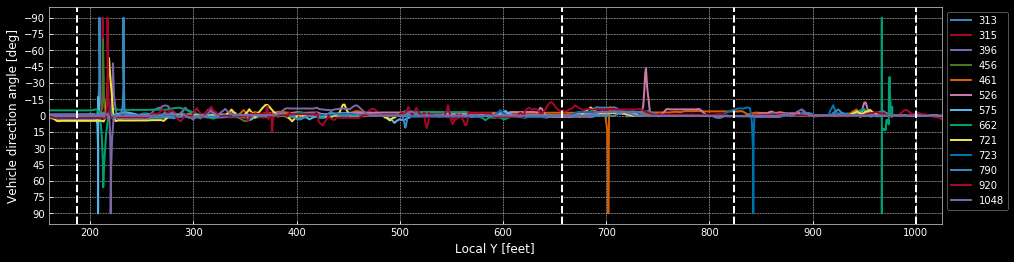

In [180]:
plot_xy('Local Y', 'Vehicle Velocity', 'Local Y [feet]', 'Vehicle Velocity [feet/s]', '0.9', funky_vehicles)
plt.gca().invert_yaxis()
plot_angle('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles)#, df.rolling(window=15).mean())
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

<Figure size 1152x576 with 0 Axes>

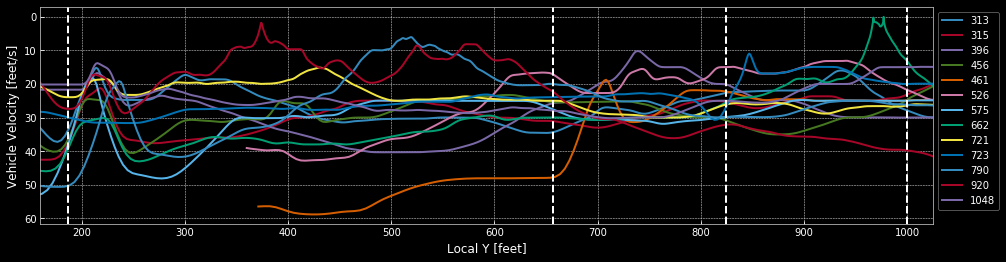

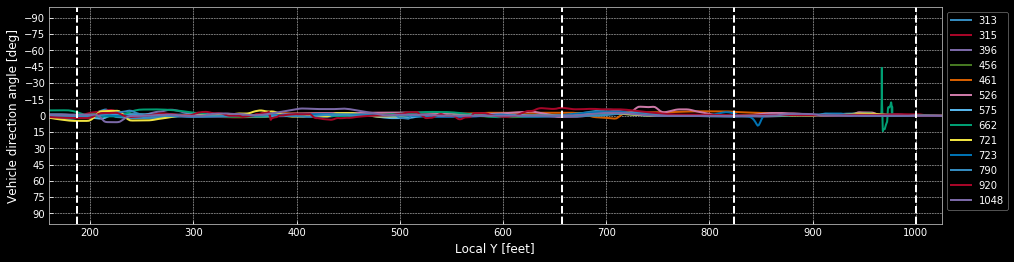

In [106]:
plot_xy('Local Y', 'Vehicle Velocity', 'Local Y [feet]', 'Vehicle Velocity [feet/s]', '0.9', funky_vehicles, df.rolling(window=15).mean())
plot_angle('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles, df.rolling(window=15).mean())
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [87]:
def plot_angle_t(x, y, xlabel, ylabel, grid, vehicles, my_df=None):
    my_df = df if my_df is None else my_df
    plt.figure(figsize=(16,4))
    ax = None
    for v in vehicles:
        x = my_df[my_df['Vehicle ID'] == v]['Local Y'].values
        diff = my_df[my_df['Vehicle ID'] == v].diff()
        delta_x = diff['Local Y'].values
        delta_y = diff['Local X'].values
        alpha = np.arctan2(delta_y, delta_x) * 180 / np.pi
#         plt.plot(x, alpha, label=v)
        plt.plot(alpha, label=v)
    plt.xlabel('Time steps / 10 [s]')
    plt.ylabel('Vehicle direction angle [deg]')
    plt.grid(color=grid)
    plt.xlim([0, 400])
    
#     plt.xlim([160, 1025])
#     plt.axvline(x=187, ls='--')
#     plt.axvline(x=657, ls='--')
#     plt.axvline(x=824, ls='--')
#     plt.axvline(x=1000, ls='--')
    plt.ylim((-100, 100))
    plt.yticks(np.linspace(-90, 90, 13))
    plt.gca().invert_yaxis()

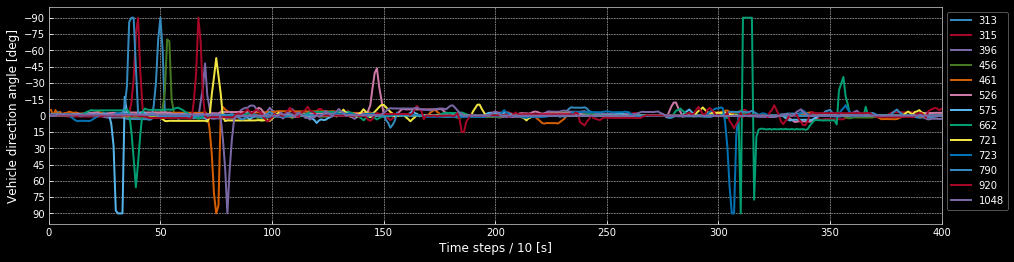

In [91]:
plot_angle_t('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles)#, df.rolling(window=15).mean())
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

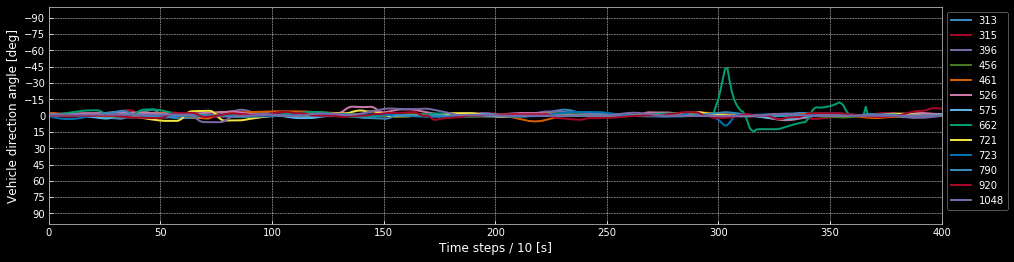

In [92]:
plot_angle_t('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles, df.rolling(window=15).mean())
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [16]:
# Basic Kalman filtering
from pykalman import KalmanFilter
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.00001 * np.eye(2))

In [17]:
# measurements = df[df['Vehicle ID'] == 662].loc[:,['Local Y', 'Local X']].rolling(window=15).mean().values
# measurements = df[df['Vehicle ID'] == 662].loc[:,['Local Y', 'Local X']].values
measurements = df[df['Vehicle ID'] == 662].loc[:,['Local X']].values

In [18]:
kf.em(measurements)

In [19]:
a, b = kf.smooth(measurements)

In [20]:
a.shape

(753, 2)

In [21]:
df.at[df.index[0], 'Vehicle ID']

284

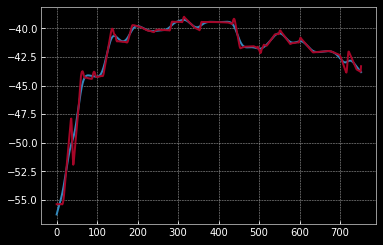

In [22]:
plt.plot(-a[:,0])
plt.plot(-measurements)

In [23]:
for v in funky_vehicles:
    measurements = df[df['Vehicle ID'] == v].loc[:,['Local X']].values
    kf.initial_state_mean = np.array((measurements[0], measurements[1] - measurements[0])).reshape(2)
    a, b = kf.smooth(measurements)
    plt.figure()
    plt.plot(-a[:,0])
    plt.plot(-measurements)

NameError: name 'funky_vehicles' is not defined

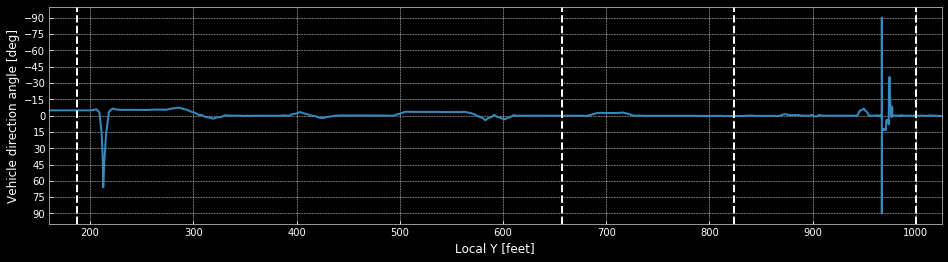

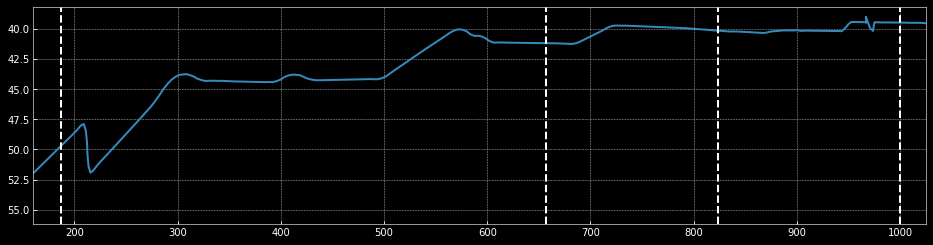

In [141]:
plot_angle('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', (662,))#, df.rolling(window=15).mean())

plt.figure(figsize=(16,4))
plt.plot(measurements[:,0], measurements[:,1])
plt.xlim([160, 1025])
plt.axvline(x=187, ls='--')
plt.axvline(x=657, ls='--')
plt.axvline(x=824, ls='--')
plt.axvline(x=1000, ls='--')
plt.gca().invert_yaxis()

Text(0.5,0,'Time steps / 10 [s]')

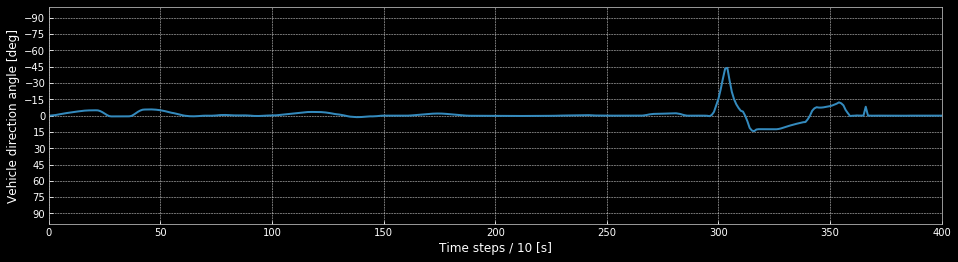

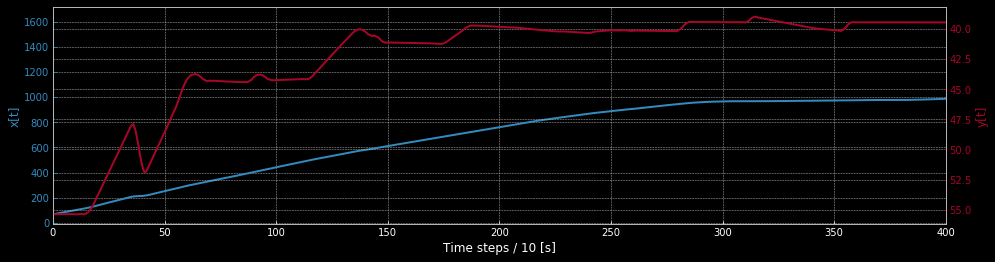

In [157]:
plot_angle_t('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', (662,), df.rolling(window=15).mean())

_, ax1 = plt.subplots(figsize=(16,4))
ax2 = ax1.twinx()

ax1.plot(measurements[:,0])
ax1.set_ylabel('x[t]', color='C0')
ax1.tick_params('y', colors='C0')

ax2.plot(measurements[:,1], 'C1')
ax2.set_ylabel('y[t]', color='C1')
ax2.tick_params('y', colors='C1')
ax2.invert_yaxis()

plt.xlim([0, 400])
ax1.set_xlabel('Time steps / 10 [s]')

In [177]:
delta = (list(), list())
for v in df['Vehicle ID'].unique():
    diff = df[df['Vehicle ID'] == v].diff()
    delta_x = diff['Local Y'].values
    delta_y = diff['Local X'].values
    delta[0].append(np.nanmax(delta_x))
    delta[1].append(np.nanmax(delta_y))    

In [178]:
print([max(d) for d in delta])

[17.014000000000003, 7.091000000000002]


Text(0.5,0,'Time steps / 10 [s]')

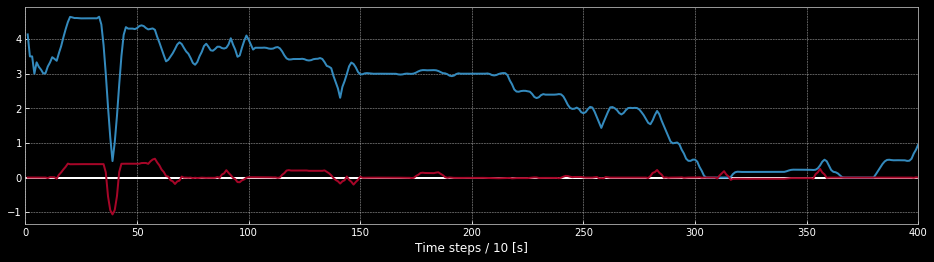

In [176]:
plt.figure(figsize=(16,4))
plt.axhline()
plt.plot(delta_x)
plt.plot(-delta_y)
plt.xlim([0, 400])
plt.xlabel('Time steps / 10 [s]')

In [200]:
def plot_smooth_angle(x, y, xlabel, ylabel, grid, vehicles, my_df=None, a=0, b=1):
    my_df = df if my_df is None else my_df
    plt.figure(figsize=(16,4))
    ax = None
    for v in vehicles:
        x = my_df[my_df['Vehicle ID'] == v]['Local Y'].values
        diff = my_df[my_df['Vehicle ID'] == v].diff()
        delta_x = diff['Local Y'].values
        delta_y = diff['Local X'].values
        speed = my_df[my_df['Vehicle ID'] == v]['Vehicle Velocity'].values
        alpha = np.arctan2(delta_y * np.maximum(0, np.tanh(a + b * speed)), delta_x) * 180 / np.pi
        plt.plot(x, alpha, label=v)
    plt.xlabel(xlabel)
    plt.ylabel('Vehicle direction angle [deg]')
    plt.grid(color=grid)
    plt.xlim([160, 1025])
    plt.axvline(x=187, ls='--')
    plt.axvline(x=657, ls='--')
    plt.axvline(x=824, ls='--')
    plt.axvline(x=1000, ls='--')
    plt.ylim((-100, 100))
    plt.yticks(np.linspace(-90, 90, 13))
    plt.gca().invert_yaxis()


<Figure size 1152x576 with 0 Axes>

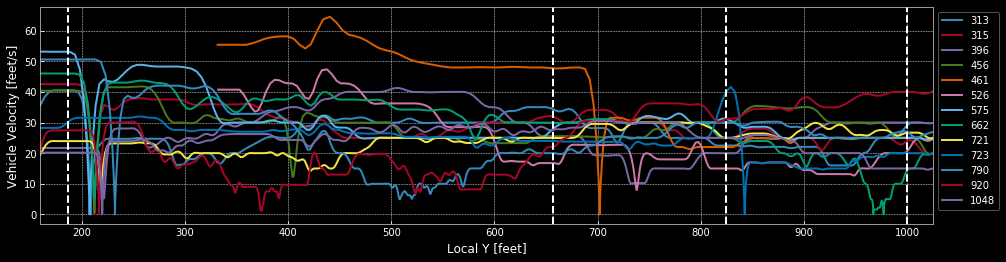

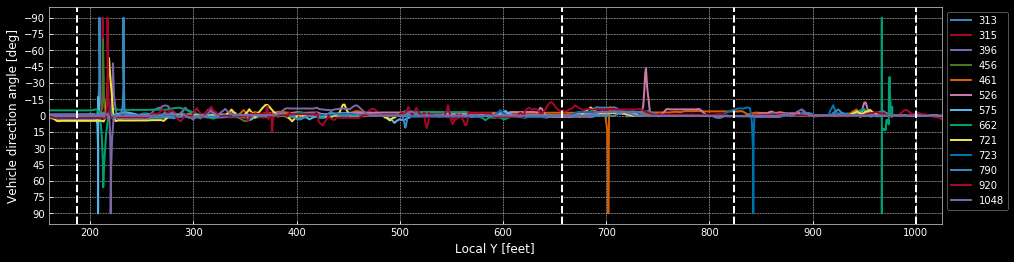

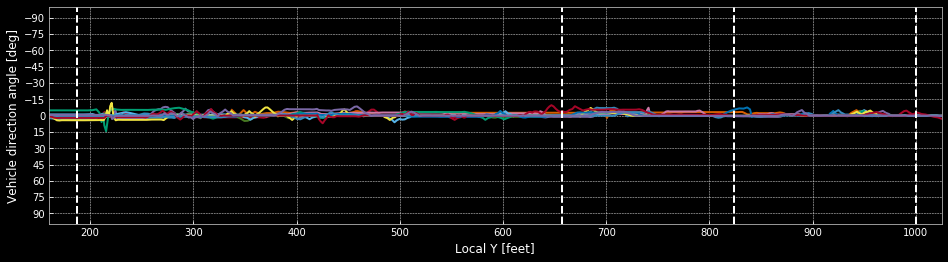

In [211]:
plot_xy('Local Y', 'Vehicle Velocity', 'Local Y [feet]', 'Vehicle Velocity [feet/s]', '0.9', funky_vehicles)
plt.gca().invert_yaxis();
plot_angle('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles)
plt.legend(bbox_to_anchor=(1,1), loc="upper left");
plot_smooth_angle('Local Y', 'Local X', 'Local Y [feet]', 'Original data', '0.9', funky_vehicles, a=-1, b=.1)

fitted model: <pykalman.standard.KalmanFilter object at 0x1241139e8>


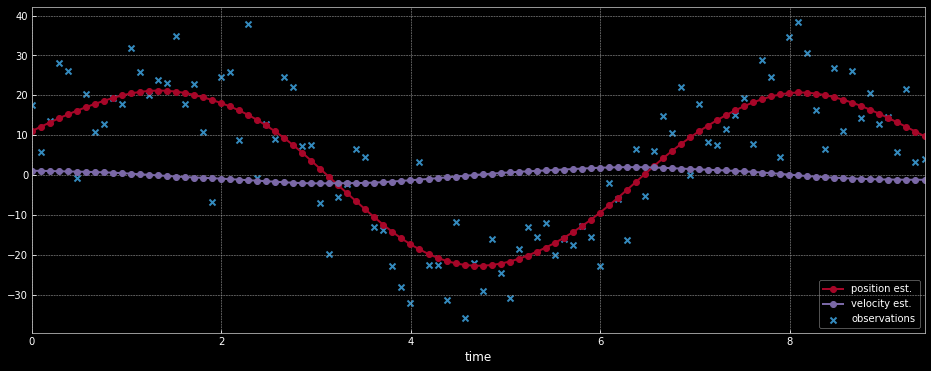

In [252]:
r'''
==================================
Kalman Filter tracking a sine wave
==================================
This example shows how to use the Kalman Filter for state estimation.
In this example, we generate a fake target trajectory using a sine wave.
Instead of observing those positions exactly, we observe the position plus some
random noise.  We then use a Kalman Filter to estimate the velocity of the
system as well.
The figure drawn illustrates the observations, and the position and velocity
estimates predicted by the Kalman Smoother.
'''
import numpy as np
import pylab as pl

from pykalman import KalmanFilter

rnd = np.random.RandomState(0)

# generate a noisy sine wave to act as our fake observations
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
observations = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))

# create a Kalman Filter by hinting at the size of the state and observation
# space.  If you already have good guesses for the initial parameters, put them
# in here.  The Kalman Filter will try to learn the values of all variables.
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.
states_pred = kf.em(observations).smooth(observations)[0]
print('fitted model: {0}'.format(kf))

# Plot lines for the observations without noise, the estimated position of the
# target before fitting, and the estimated position after fitting.
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, observations, marker='x', color='C0',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],
                        linestyle='-', marker='o', color='C1',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],
                        linestyle='-', marker='o', color='C2',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time');